# Электромагнитная индукция

Магнитный диполь с моментом $p_m$ вращается с угловой скоростью $\omega$ вокруг оси, проходящей через центр и перпендикулярной магнитному моменту. Плоская круглая рамка радиусом $a$ с сопротивлением $R$ движется со скоростью $\vec{v}=(v_x,v_y,v_z)$; вектор нормали рамки $\vec{n}$ перпендикулярен оси вращения диполя. Найдём ток $I$, возникающий в рамке вследствие индукции.

Вектор магнитной индукции от диполя определяется выражением:
  $$\vec{B} = \frac{\mu_0}{4\pi} \left[ \frac{3(\vec{p_m} \cdot \vec{r})\vec{r}}{r^5} - \frac{\vec{p_m}}{r^3} \right],$$ 
где $\mu_0 = 1.2566 \cdot 10^{-6}$ Гн/м — магнитная постоянная; $\vec{p_m}$ — векторный магнитный момент диполя;  $\vec{r}$ — радиус-вектор от центра диполя до точки наблюдения. Поскольку диполь вращается, то его магнитный момент
$$\vec{p_m}(t) = \{0, \;p_m \sin(\omega t), \;p_m \cos(\omega t)\}.$$

Магнитный поток от диполя через плоскую рамку можно рассчитать, как
$$\Phi = \iint_S \vec{B} \cdot d\vec{S} = S (\vec{B}(\vec{r_c}) \cdot \vec{n}) = \pi a^2 \left( \vec{B}(\vec{r_c}) \cdot \vec{n} \right)$$
где $d\vec{S}$ — векторный элемент поверхности рамки, $S = \pi a^2$ — площадь рамки, $\vec{r_c}$ — радиус-вектор от центра диполя до центра рамки;  $\vec{B}(\vec{r_c})$ — вектор магнитной индукции, рассчитанный в центре рамки.
Поскольку рамка движется, то
$$\vec{r_c} = \{ x_0 + v_x t, \;y_0 + v_y t, \;z_0 + v_z t \}.$$
Нормаль к плоскости рамки перпендикулярна оси вращения диполя, т.е.
$$\vec{n} = \{ 0, \;0, \;1 \}.$$

Наконец, находим силу тока внутри провода рамки с помощью производной магнитного потока по времени
$$ I = \frac{1}{R} \frac{\partial \Phi}{\partial t}.$$

## Решение в аналитическом виде

Для получения искомой силы тока $I$ нужно вычислить производную магнитного потока $\Phi(t)$, которая выражается через указанные аналитические формулы для магнитной индукции $\vec{B}$, магнитного момента $\vec{p_m}(t)$, расстояния до рамки $\vec{r_c}(t)$. Выполним все преобразования в символьном виде с помощью библиотеки символьной математики [SymPy](http://sympy.org/en/). При этом для векторных вычислений будем использовать модуль `Vector` из состава `SymPy`.

Начнём с импорта необходимых частей библиотеки, которыми мы будем пользоваться.

In [2]:
import sympy

# Декартова система координат
from sympy.vector import CoordSys3D
N = CoordSys3D('N')

Определим константы и независимые переменные как символьные и зададим аналитические выражения для исходных векторных величин: магнитного момента $\vec{p_m}(t)$ и расстояния до рамки $\vec{r_c}(t)$. При этом в качестве единичных базисных векторов $\vec{i}$, $\vec{j}$ и $\vec{k}$ используем элементы определённого выше объекта системы координат `N.i`, `N.j` и `N.k` соответственно.

In [37]:
# Символьные константы
mu0_, pi_ = sympy.Symbol('\mu_0'), sympy.pi
pm_, om_ = sympy.symbols('p_m, \omega')
x0_,y0_,z0_, vx_,vy_,vz_, a_, R_  = sympy.symbols('x_0,y_0,z_0, v_x,v_y,v_z, a_,R_')

# Независимая переменная
t_ = sympy.symbols('t')

# Вектор магнитного момента
v_pm = N.i* 0.0                    \
     + N.j* pm_*sympy.sin(om_*t_)  \
     + N.k* pm_*sympy.cos(om_*t_)

# Радиус вектор рамки
v_rc = N.i* (x0_ + vx_*t_) \
     + N.j* (y0_ + vy_*t_) \
     + N.k* (z0_ + vz_*t_)

# Вектор нормали к рамке
v_n = N.k * 1

# Площадь рамки
S_ = pi_ * a_**2

Выразим вектор магнитной индукции $\vec{B}(\vec{r_c})$ и магнитный поток через рамку $\Phi$ с помощью выписанных векторных выражений `v_pm` для $\vec{p_m}$, `v_rc` для $\vec{r_c}$ и `v_n` для $\vec{n}$.

In [39]:
v_B = mu0_/pi_ * ( 3*v_pm.dot(v_rc)* v_rc/v_rc.magnitude()**5 - v_pm / v_rc.magnitude()**3 )
Phi_ = S_ * v_B.dot(v_n)
Phi_

\mu_0*a_**2*(-p_m*cos(\omega*t)/((t*v_x + x_0)**2 + (t*v_y + y_0)**2 + (t*v_z + z_0)**2)**(3/2) + (t*v_z + z_0)*(3*p_m*(t*v_y + y_0)*sin(\omega*t) + 3*p_m*(t*v_z + z_0)*cos(\omega*t))/((t*v_x + x_0)**2 + (t*v_y + y_0)**2 + (t*v_z + z_0)**2)**(5/2))

Всё готово для вычисления искомой силы тока $I(t)$ в аналитическом виде.

In [40]:
I_ = Phi_.diff(t_) / R_
I_

\mu_0*a_**2*(\omega*p_m*sin(\omega*t)/((t*v_x + x_0)**2 + (t*v_y + y_0)**2 + (t*v_z + z_0)**2)**(3/2) - p_m*(-3*v_x*(t*v_x + x_0) - 3*v_y*(t*v_y + y_0) - 3*v_z*(t*v_z + z_0))*cos(\omega*t)/((t*v_x + x_0)**2 + (t*v_y + y_0)**2 + (t*v_z + z_0)**2)**(5/2) + v_z*(3*p_m*(t*v_y + y_0)*sin(\omega*t) + 3*p_m*(t*v_z + z_0)*cos(\omega*t))/((t*v_x + x_0)**2 + (t*v_y + y_0)**2 + (t*v_z + z_0)**2)**(5/2) + (t*v_z + z_0)*(3*p_m*(t*v_y + y_0)*sin(\omega*t) + 3*p_m*(t*v_z + z_0)*cos(\omega*t))*(-5*v_x*(t*v_x + x_0) - 5*v_y*(t*v_y + y_0) - 5*v_z*(t*v_z + z_0))/((t*v_x + x_0)**2 + (t*v_y + y_0)**2 + (t*v_z + z_0)**2)**(7/2) + (t*v_z + z_0)*(3*\omega*p_m*(t*v_y + y_0)*cos(\omega*t) - 3*\omega*p_m*(t*v_z + z_0)*sin(\omega*t) + 3*p_m*v_y*sin(\omega*t) + 3*p_m*v_z*cos(\omega*t))/((t*v_x + x_0)**2 + (t*v_y + y_0)**2 + (t*v_z + z_0)**2)**(5/2))/R_

Получается довольно громоздкое выражение, в которое явно входит, например, раскрытая до базовых переменных формула длины радиус-вектора рамки $\vec{r_c}$. Выражение можно немного упростить с помощью метода `simpy.simplify()`, но следует учитывать, что метод на таком длинном выражении работает довольно долго. 

In [34]:
I_.simplify()

\mu_0*a_**2*p_m*(\omega*((t*v_x + x_0)**2 + (t*v_y + y_0)**2 + (t*v_z + z_0)**2)**2*sin(\omega*t) - 15*(t*v_z + z_0)*((t*v_y + y_0)*sin(\omega*t) + (t*v_z + z_0)*cos(\omega*t))*(v_x*(t*v_x + x_0) + v_y*(t*v_y + y_0) + v_z*(t*v_z + z_0)) + 3*(v_z*((t*v_y + y_0)*sin(\omega*t) + (t*v_z + z_0)*cos(\omega*t)) + (t*v_z + z_0)*(\omega*(t*v_y + y_0)*cos(\omega*t) - \omega*(t*v_z + z_0)*sin(\omega*t) + v_y*sin(\omega*t) + v_z*cos(\omega*t)) + (v_x*(t*v_x + x_0) + v_y*(t*v_y + y_0) + v_z*(t*v_z + z_0))*cos(\omega*t))*((t*v_x + x_0)**2 + (t*v_y + y_0)**2 + (t*v_z + z_0)**2))/(R_*((t*v_x + x_0)**2 + (t*v_y + y_0)**2 + (t*v_z + z_0)**2)**(7/2))

## Визуализация решения

Для визуализации полученного решения применим библиотеки `NumPy` и `Matplotlib`.

In [43]:
import numpy as np

# отображение графиков внутри блокнота (вызывать ПЕРЕД импортом библиотеки)
%matplotlib inline
import matplotlib.pyplot as plt

Для построения графика $I(t)$ в полученном аналитическом выражении нужно задать конкретные численные значения для входящих в него констант. Выберем значения произвольно и проведём замену соответствующих символьных констант внутри выражения `I_` с помощью метода `subs()`.

In [42]:
Inum_ = I_.subs( {
    mu0_ : 1.2566e-6, # магнитная постоянная
    pm_ : 1.0,  # величина магнитного момента диполя
    om_ : 2*float(pi_), # круговая частота вращения диполя
    x0_ : 1.0, y0_ : 1.0, z0_ : 1.0, # начальные координаты центра рамки
    vx_ : 1.0, vy_ : 2.0, vz_ : 3.0, # компоненты вектора скорости рамки
    a_ : 1.0, # радиус рамки
    R_ : 1.0  # сопротивление рамки
    }, simultaneous=True )

Теперь преобразуем полученное символьное выражение SymPy в функцию python с помощью метода `sympy.lambdify()`. Нужно только указать, что символ `t_` является независимой переменной.

In [44]:
Ifunc = sympy.lambdify( (t_), Inum_ )

Наконец, построим график зависимости силы тока в рамке от времени

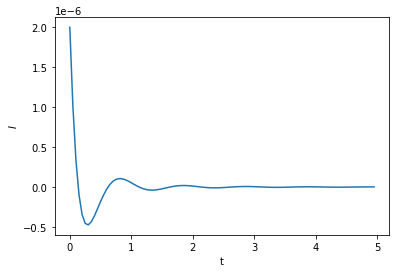

In [50]:
tt = np.arange(0.0, 5.0, 0.05)
plt.xlabel('t')
plt.ylabel('$I$')
plt.plot( tt, Ifunc(tt) );

Видим очевидный результат: по мере удаления рамки от вращающегося диполя сила тока в рамке уменьшается.